In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import json

# <font size="6">1. Khai báo tên file</font>

In [2]:
commits_file_name = r'D:\projects\Python\BTL\cleaned_data\cleaned_100_commit_per_month_data.xlsx'
commits_since_June_2023_file_name = r'D:\projects\Python\BTL\raw_data\commits_since_June_2023_data.json'

# <font size="6">2. Mở dữ liệu và làm sạch</font>

<font size="4">2.1. Mở dữ liệu commmit từ tháng 6/2023 để phân tích tốc độ tăng commits</font>

In [3]:
with open(commits_since_June_2023_file_name, 'r', encoding='utf-8') as file:
    commits_since_June_2023_data = json.load(file)
commits_since_June_df = pd.json_normalize(commits_since_June_2023_data)
commits_since_June_df = commits_since_June_df[['commit.author.date']].sort_values(by='commit.author.date', ascending=True, ignore_index=True)

<font size="4">2.2. Mở dữ liệu 100 commmit mỗi tháng từ năm 2021 để phân tích tốc độ tăng contributor</font>

In [4]:
df = pd.read_excel(commits_file_name, index_col=0)
df.sort_values(by='commit.author.date', ignore_index=True, inplace=True)


# <font size="6">3. Phân tích dữ liệu</font>

<font size="4">2.1.1. Hàm lấy số lượng contributor qua từng tháng</font>

In [6]:
def get_num_of_contributor_since_2021_to_a_specific_month(months):
    num_of_contributor = []
    contributors = []
    
    for i in range(len(months)):
        month = months[i]
        month_search = datetime.strftime(datetime.strptime(month, '%m/%Y'), '%Y-%m')
        tmp_contributor = set(df[df['commit.author.date'].str.contains(month_search)]['commit.author.name'].to_list())
        for contributor in tmp_contributor:
            if contributor not in contributors:
                contributors.append(contributor)
        num_of_contributor.append(len(contributors))
    return num_of_contributor
        

<font size="4">2.1.2. Phân tích số lượng contributor qua từng tháng</font>

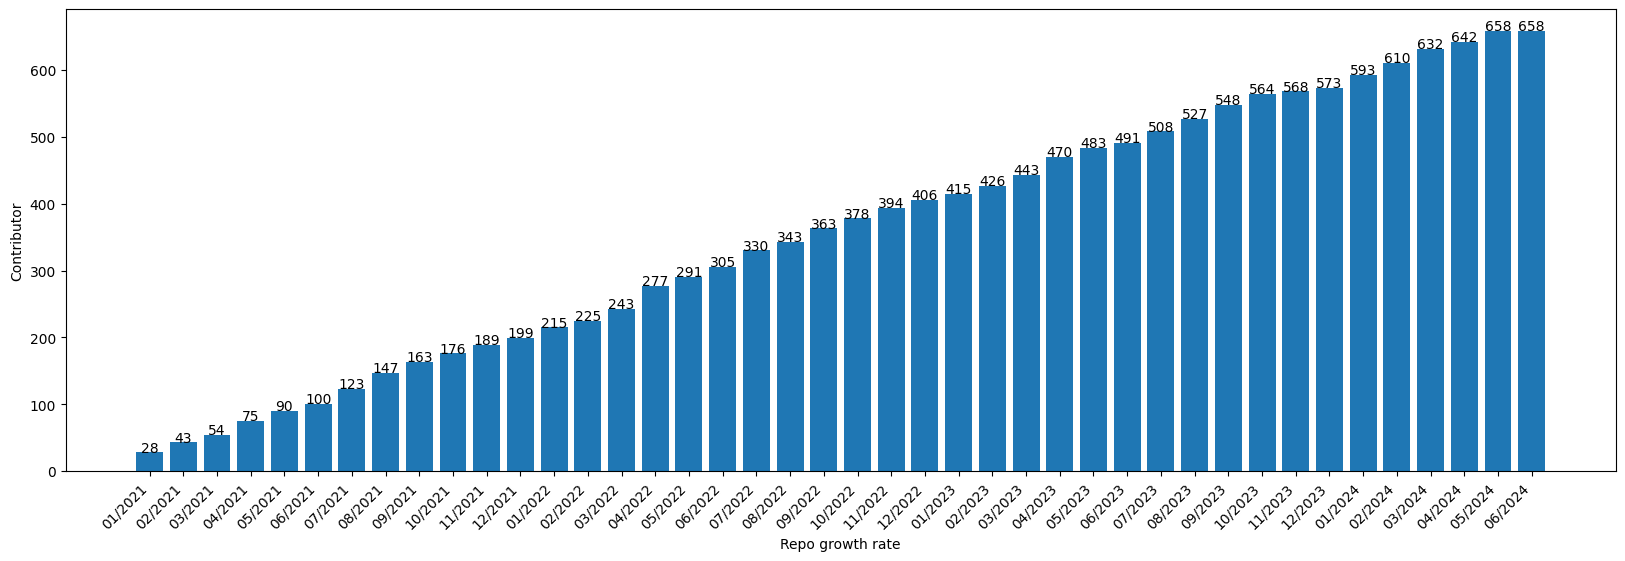

In [7]:
months = []
for year in range(2021, 2025):
    for month in range(1, 13):
        if year == 2024 and month > 6:
            break
        months.append(f"{month:02d}/{year}")
num_of_contributor = get_num_of_contributor_since_2021_to_a_specific_month(months)

name = months
value = num_of_contributor

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(len(num_of_contributor)):
    plt.text(i, value[i] + 1, value[i], ha = 'center')
plt.ylabel('Contributor')
plt.xlabel('Repo growth rate')
plt.show()

<font size="4">2.2.1. Hàm lấy số lượng commit qua từng tháng</font>

In [8]:
def get_num_of_commmits_since_June_2023(months):
    num_of_commits = []
    
    for i in range(len(months)):
        month = months[i]
        month_search = datetime.strftime(datetime.strptime(month, '%m/%Y'), '%Y-%m')
        if i == 0:
            before_month = 0
        else:
            before_month = num_of_commits[i - 1]
        tmp_num_of_commits = before_month + len(commits_since_June_df[commits_since_June_df['commit.author.date'].str.contains(month_search)])
        
        num_of_commits.append(tmp_num_of_commits)
    return num_of_commits

<font size="4">2.2.2. Phân tích số lượng commit qua từng tháng</font>

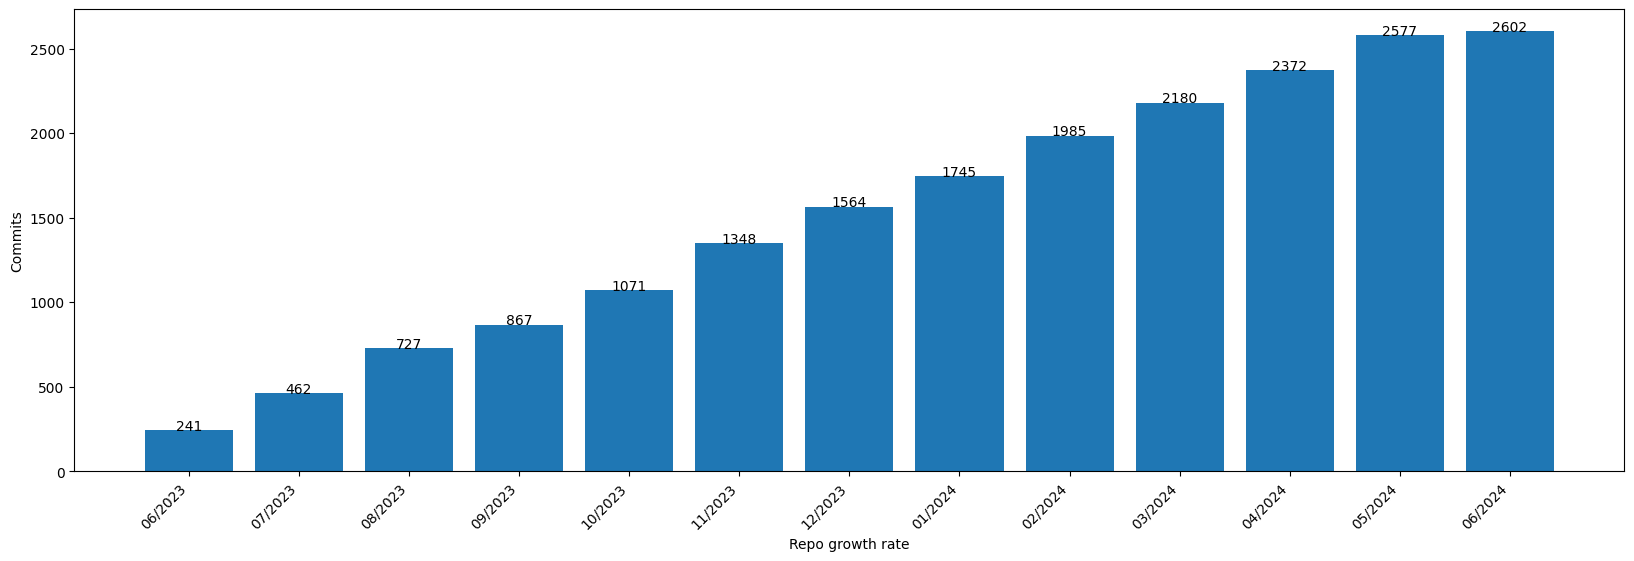

In [9]:
months = []
for year in range(2023, 2025):
    for month in range(1, 13):
        if year == 2023 and month < 6:
            continue
        if year == 2024 and month > 6:
            break
        months.append(f"{month:02d}/{year}")
num_of_commits = get_num_of_commmits_since_June_2023(months)

name = months
value = num_of_commits

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(name, value)
ax.set_xticks(name)
ax.set_xticklabels(name, rotation = 45, ha = 'right')
for i in range(len(num_of_commits)):
    plt.text(i, value[i] + 1, value[i], ha = 'center')
plt.ylabel('Commits')
plt.xlabel('Repo growth rate')
plt.show()